# House Rent Prediction

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
df = pd.read_csv(r"C:\Users\hs081\Downloads\House_Rent_Dataset.csv")

In [222]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [224]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [225]:

df_col_ohe

,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,Carpet Area,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...
4741,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,Carpet Area,Hyderabad,Semi-Furnished,Family,Contact Agent


In [229]:
df_Area  = df[['Area Type']]
df_City = df[['City']]
df_Furnish = df[['Furnishing Status']]
df_Tenant = df[['Tenant Preferred']]
df_Point = df[['Point of Contact']]

In [230]:
## Applying One hot Encoding on Nominal Columns

from sklearn.preprocessing import OneHotEncoder
ohe_Area = OneHotEncoder(sparse = False , dtype = np.int32 , handle_unknown='ignore')
df_Area_tranform = ohe_Area.fit_transform(df_Area)

ohe_City = OneHotEncoder(sparse = False , dtype = np.int32 , handle_unknown='ignore')
df_City_transform = ohe_City.fit_transform(df_City)

ohe_Furnish = OneHotEncoder(sparse = False , dtype = np.int32 , handle_unknown='ignore')
df_Furnish_transform = ohe_Furnish.fit_transform(df_Furnish)

ohe_Tenant = OneHotEncoder(sparse = False , dtype = np.int32 , handle_unknown='ignore')
df_Tenant_transform = ohe_Tenant.fit_transform(df_Tenant)

ohe_Point = OneHotEncoder(sparse = False , dtype = np.int32 , handle_unknown='ignore')
df_Point_transform =  ohe_Point.fit_transform(df_Point)

In [232]:
df_Area_tranform = pd.DataFrame(df_Area_tranform , columns = ohe_Area.get_feature_names_out())
df_City_transform = pd.DataFrame(df_City_transform , columns = ohe_City.get_feature_names_out())
df_Furnish_transform = pd.DataFrame(df_Furnish_transform , columns = ohe_Furnish.get_feature_names_out())
df_Tenant_transform = pd.DataFrame(df_Tenant_transform , columns = ohe_Tenant.get_feature_names_out())
df_Point_transform = pd.DataFrame(df_Point_transform , columns = ohe_Point.get_feature_names_out())

In [233]:
df_Area_tranform.sample()

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
2092,0,1,0


In [234]:
df_City_transform.sample()

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
4,0,0,0,0,1,0


In [235]:
df_Furnish_transform.sample()

,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
2851,0,0,1


In [236]:
df_Tenant_transform.sample()

,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
4411,0,1,0


In [237]:
df_Point_transform.sample()

,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1371,1,0,0


In [238]:
df_Area_tranform.shape , df_City_transform.shape , df_Furnish_transform.shape , df_Tenant_transform.shape , df_Point_transform.shape

((4746, 3), (4746, 6), (4746, 3), (4746, 3), (4746, 3))

In [239]:
df_tranform = pd.concat((df_Area_tranform ,df_City_transform , df_Furnish_transform , df_Tenant_transform , df_Point_transform ) , axis = 1)

In [240]:
df_tranform.head()

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [241]:
df_tranform.shape

(4746, 18)

In [242]:
df_remaning = df.drop(columns = ['Area Type' , 'City' , 'Furnishing Status' , 'Tenant Preferred' , 'Point of Contact'])

In [243]:
df_remaning.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1


In [244]:
df_remaning.shape

(4746, 7)

In [245]:
df_remaning.isnull().sum()

Posted On        0
BHK              0
Rent             0
Size             0
Floor            0
Area Locality    0
Bathroom         0
dtype: int64

In [246]:
df_remaning.drop(['Posted On' , 'Floor' , 'Area Locality'] , axis = 1 , inplace = True)

In [247]:
df_final = pd.concat((df_remaning , df_tranform) , axis = 1)

In [248]:
df_final.shape

(4746, 22)

In [249]:
df_final.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


<AxesSubplot:xlabel='Rent'>

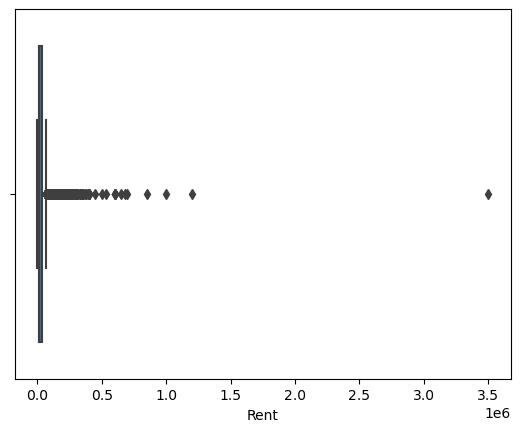

In [250]:
## Removing Outliers from Rent 
sns.boxplot(x = 'Rent' ,data = df)

In [251]:
## many OUtliers in the Output Feature -> isse overfitting ho jayegi toh rent me se outliers ko delete kar do

np.where(df['Rent'] > 100000)

(array([ 104,  530,  531,  533,  542,  543,  545,  556,  560,  579,  589,
         591,  593,  595,  600,  601,  603,  606,  607,  615,  617,  623,
         625,  627,  631,  634,  635,  639,  643,  651,  658,  666,  673,
         680,  682,  685,  687,  699,  700,  701,  702,  706,  710,  726,
         727,  728,  733,  735,  742,  745,  749,  754,  757,  766,  768,
         770,  771,  773,  777,  778,  780,  788,  789,  790,  792,  795,
         798,  799,  827,  829,  832,  835,  839,  842,  847,  848,  850,
         851,  857,  858,  859,  867,  869,  871,  874,  876,  889,  898,
         902,  921,  923,  927,  930,  932,  936,  951,  952,  973,  984,
         985,  986,  988,  991,  992,  994,  995, 1001, 1004, 1005, 1010,
        1019, 1023, 1024, 1029, 1030, 1031, 1032, 1034, 1035, 1037, 1042,
        1045, 1052, 1055, 1065, 1071, 1084, 1086, 1087, 1089, 1093, 1099,
        1105, 1112, 1113, 1115, 1120, 1122, 1143, 1146, 1151, 1159, 1160,
        1161, 1163, 1165, 1170, 1171, 

In [252]:
df_final.drop([ 104,  530,  531,  533,  542,  543,  545,  556,  560,  579,  589,
         591,  593,  595,  600,  601,  603,  606,  607,  615,  617,  623,
         625,  627,  631,  634,  635,  639,  643,  651,  658,  666,  673,
         680,  682,  685,  687,  699,  700,  701,  702,  706,  710,  726,
         727,  728,  733,  735,  742,  745,  749,  754,  757,  766,  768,
         770,  771,  773,  777,  778,  780,  788,  789,  790,  792,  795,
         798,  799,  827,  829,  832,  835,  839,  842,  847,  848,  850,
         851,  857,  858,  859,  867,  869,  871,  874,  876,  889,  898,
         902,  921,  923,  927,  930,  932,  936,  951,  952,  973,  984,
         985,  986,  988,  991,  992,  994,  995, 1001, 1004, 1005, 1010,
        1019, 1023, 1024, 1029, 1030, 1031, 1032, 1034, 1035, 1037, 1042,
        1045, 1052, 1055, 1065, 1071, 1084, 1086, 1087, 1089, 1093, 1099,
        1105, 1112, 1113, 1115, 1120, 1122, 1143, 1146, 1151, 1159, 1160,
        1161, 1163, 1165, 1170, 1171, 1175, 1182, 1189, 1196, 1199, 1202,
        1205, 1208, 1221, 1222, 1230, 1233, 1238, 1247, 1251, 1255, 1261,
        1273, 1275, 1287, 1290, 1292, 1302, 1303, 1309, 1319, 1329, 1341,
        1344, 1345, 1352, 1366, 1369, 1378, 1380, 1384, 1388, 1389, 1391,
        1392, 1393, 1399, 1402, 1421, 1425, 1431, 1438, 1439, 1449, 1451,
        1459, 1460, 1471, 1476, 1482, 1484, 1485, 1489, 1495, 1553, 1576,
        1680, 1718, 1798, 1810, 1829, 1837, 1877, 1910, 1935, 2028, 2048,
        2079, 2186, 2209, 2213, 2229, 2236, 2340, 2399, 2403, 2486, 2533,
        2577, 2598, 2623, 2642, 2656, 2750, 2755, 2794, 2823, 2845, 2846,
        2848, 2849, 2857, 2869, 2904, 2912, 2923, 2932, 2990, 3041, 3134,
        3148, 3320, 3401, 3453, 3457, 3518, 3581, 3639, 3656, 3709, 3770,
        3792, 3795, 3879, 3989, 4004, 4021, 4041, 4097, 4161, 4185, 4241,
        4425, 4457, 4543, 4669, 4716], axis=0, inplace=True)

In [253]:
df_final.isnull().sum()

BHK                                  0
Rent                                 0
Size                                 0
Bathroom                             0
Area Type_Built Area                 0
Area Type_Carpet Area                0
Area Type_Super Area                 0
City_Bangalore                       0
City_Chennai                         0
City_Delhi                           0
City_Hyderabad                       0
City_Kolkata                         0
City_Mumbai                          0
Furnishing Status_Furnished          0
Furnishing Status_Semi-Furnished     0
Furnishing Status_Unfurnished        0
Tenant Preferred_Bachelors           0
Tenant Preferred_Bachelors/Family    0
Tenant Preferred_Family              0
Point of Contact_Contact Agent       0
Point of Contact_Contact Builder     0
Point of Contact_Contact Owner       0
dtype: int64

In [254]:
df_final.shape

(4466, 22)

In [255]:
## Model Traning Steps

X = df_final.drop('Rent' , axis = 1)
y = df_final['Rent']

In [256]:
X.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,800,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,1000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,800,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,850,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [257]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4466, dtype: int64

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=25)

In [260]:
x_train.shape , x_test.shape

((3126, 21), (1340, 21))

In [261]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# fit=scaler.fit(x_train)
# X_train=fit.transform(x_train)
# X_test=fit.transform(x_test)

In [262]:
x_train.shape , x_test.shape

((3126, 21), (1340, 21))

In [263]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9330692820304903
0.7480574378575794


### Saving the model 

In [264]:
import pickle

## saving the tranformation (ohe)

pickle.dump(ohe_Area , open('ohe_Area.pkl' , 'wb'))
pickle.dump(ohe_City , open('ohe_City.pkl' , 'wb'))
pickle.dump(ohe_Furnish , open('ohe_Furnish.pkl' , 'wb'))
pickle.dump(ohe_Tenant , open('ohe_Tenant.pkl' , 'wb'))
pickle.dump(ohe_Point , open('ohe_Point.pkl' , 'wb'))

In [265]:
## Saving the Model 

pickle.dump(rf , open('model_rf.pkl' , 'wb'))

In [266]:
## Loading the Tranformation (ohe)
df_ohe_Area = pickle.load(open('ohe_Area.pkl' , 'rb'))
df_ohe_City = pickle.load(open('ohe_City.pkl' , 'rb'))
df_ohe_Furnish = pickle.load(open('ohe_Furnish.pkl' , 'rb'))
df_ohe_Tenant = pickle.load(open('ohe_Tenant.pkl' , 'rb'))
df_ohe_Point = pickle.load(open('ohe_Point.pkl' , 'rb'))

In [267]:
## Loading the Model  

model = pickle.load(open('model_rf.pkl' , 'rb'))

In [268]:
## Prediction 

test_input = np.array([2 , 1100  , 'Super Area' , 'Kolkata' , 'Unfurnished' , 'Bachelors/Family' ,2 , 'Contact Owner'] , dtype = object).reshape(1,8)

In [269]:
test_input

array([[2, 1100, 'Super Area', 'Kolkata', 'Unfurnished',
        'Bachelors/Family', 2, 'Contact Owner']], dtype=object)

In [270]:
test_input_Area = df_ohe_Area.transform(test_input[:,2].reshape(1,1))

In [271]:
test_input_Area

array([[0, 0, 1]])

In [272]:
test_input_City = df_ohe_City.transform(test_input[:,3].reshape(1,1))

In [273]:
test_input_City

array([[0, 0, 0, 0, 1, 0]])

In [274]:
test_input_Furnish = df_ohe_Furnish.transform(test_input[:,4].reshape(1,1))

In [275]:
test_input_Furnish

array([[0, 0, 1]])

In [276]:
test_input_Tenant = df_ohe_Tenant.transform(test_input[:,5].reshape(1,1))

In [277]:
test_input_Tenant

array([[0, 1, 0]])

In [278]:
test_input_Point = df_ohe_Point.transform(test_input[:,7].reshape(1,1))

In [279]:
test_input_Point

array([[0, 0, 1]])

In [280]:
test_input_rem = test_input[:,[0,1,6]]

In [281]:
test_input_rem.shape

(1, 3)

In [282]:
final_array = np.concatenate((test_input_rem ,test_input_Area  , test_input_City , test_input_Furnish , test_input_Tenant ,test_input_Point), axis = 1)

In [283]:
final_array

array([[2, 1100, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]],
      dtype=object)

In [285]:
## Final Prediction 

## Actual value is = 10000 and our predicted value is 11550.224 nearly same

rf.predict(final_array)

array([11550.22438672])